In [1]:
import seaborn as sns

sns.set_theme()

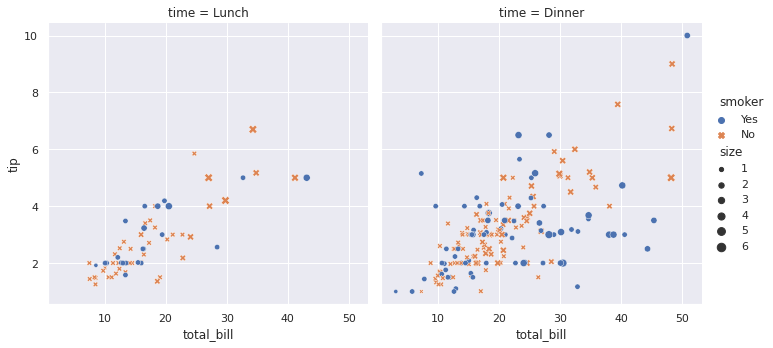

In [11]:
# getting the data
tips = sns.load_dataset("tips")

# create a viz
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

The function relplot() is named that way because it is designed to visualize many different statistical relationships.


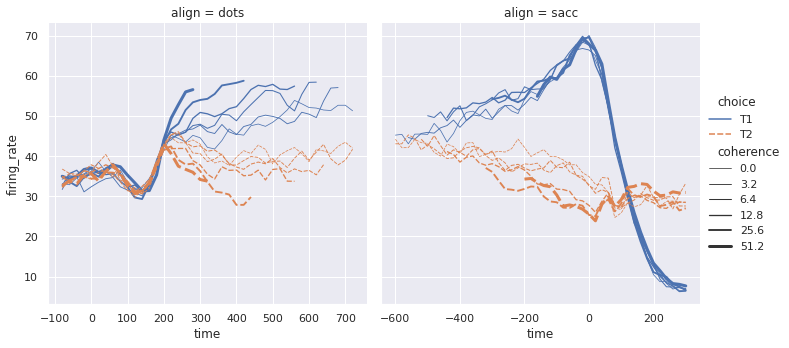

In [16]:
# using a line plot instead of a scatter, data: dots
dots = sns.load_dataset("dots")

sns.relplot(
    data=dots, 
    kind="line",
    x="time", 
    y="firing_rate", 
    col="align", 
    hue="choice", 
    size="coherence", 
    style="choice", 
    facet_kws=dict(sharex=False),
)